In [48]:
# Interactive Visualization with Plotly

For this lab, you'll need to install Plotly. Make sure to follow *both* the [plotly](https://plotly.com/python/getting-started/#installation) steps and the [jupyter support](https://plotly.com/python/getting-started/#jupyterlab-support) steps.

[Plotly](https://plotly.com/python/) is an interactive visualization package which is as part of the [Plotly and Dash](https://plot.ly) enterprise. Here we'll showcase just a few graphs to get you acquainted with their [Plotly Express](https://plotly.com/python/plotly-express/) module. We'll use [data from the titanic disaster](https://www.kaggle.com/competitions/titanic/data).

In [49]:
import plotly.express as px
import pandas as pd

In [50]:
df = pd.read_csv('/Users/ramyaamudapakula/Desktop/Sem1/Intro to Informatics/Projects/I501 labs and pair problems/lab_7/titanic.csv')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Scatter Plots

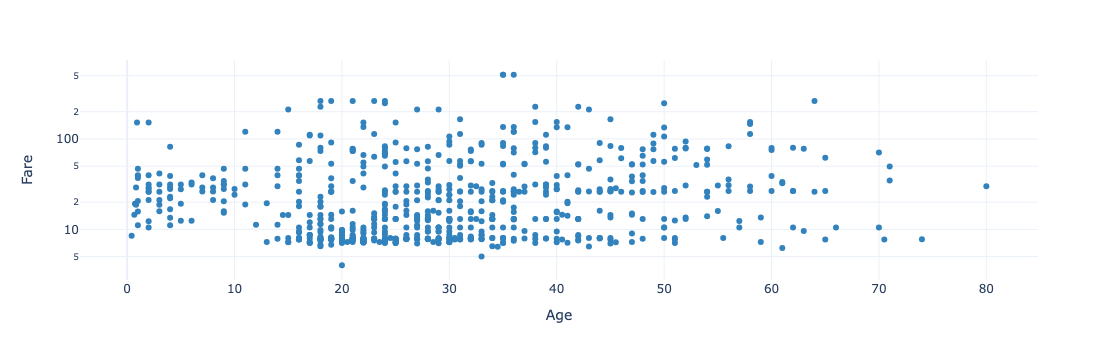

In [52]:
fig = px.scatter(data_frame=df,
                 x='Age',
                 y='Fare',
                 hover_data=['Name', 'Sex'],
                 template='plotly_white',
                 color_discrete_sequence=['#3182bd'],
                 log_y=True)
fig.show()

## Bar Charts

We can create some [interesting bar chart variations](https://plot.ly/python/bar-charts/):

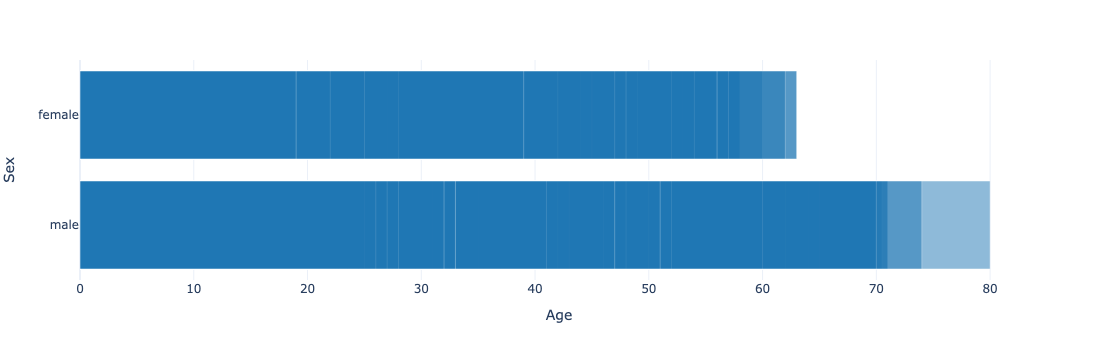

In [53]:
fig = px.bar(df, 
             x='Age', 
             y='Sex',
             barmode='overlay',
             hover_data=['Name'],
             template='plotly_white',
             color_discrete_sequence=px.colors.qualitative.D3
            )
fig.show()

## Histograms

In [54]:
df['Survived'].dtype

dtype('int64')

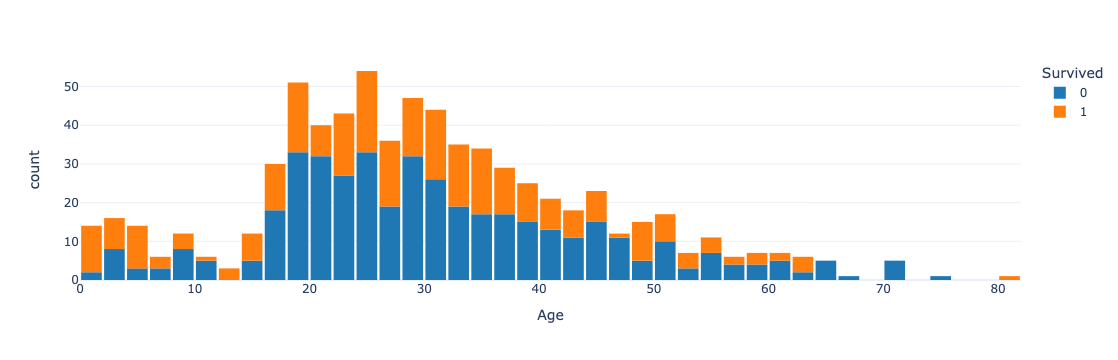

In [55]:
fig = px.histogram(df, 
                   x='Age', 
                   color='Survived',
                   template='plotly_white',
                   color_discrete_sequence=px.colors.qualitative.D3
                  )

fig.update_layout(
    bargap=0.1, # gap between bars of adjacent location coordinates
)

fig.show()

## Bubble Plot

For this plot, we'll transform the data a bit to investigate the survival rates across different age decades.

In [56]:
# calculate decade
df['Age_rounded'] = df['Age'].round(-1)
df[['Age', 'Age_rounded']].head()

,Age,Age_rounded
0,22.0,20.0
1,38.0,40.0
2,26.0,30.0
3,35.0,40.0
4,35.0,40.0


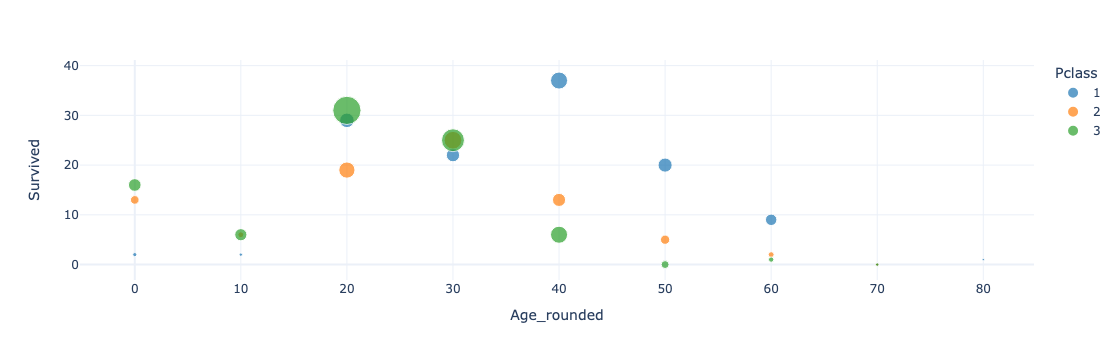

In [57]:
df_plot = df.groupby(['Pclass', 'Age_rounded'])['Survived'] \
            .agg([('Survived', 'sum'), 
                  ('Passengers', 'count')]).reset_index()

df_plot["Pclass"] = df_plot["Pclass"].astype(str)

fig = px.scatter(data_frame=df_plot,
                 x='Age_rounded',
                 y='Survived',
                 size='Passengers',
                 color='Pclass',
                 color_discrete_sequence=px.colors.qualitative.D3,
                 template='plotly_white')
fig.show()

## Limitations ...

What if we want to be able to "animate" the age decade of the passengers? [Be careful](https://plotly.com/python/animations/#:~:text=Animations%20are%20designed%20to%20work%20well%20when%20each%20row%20of%20input%20is%20present%20across%20all%20animation%20frames%2C%20and%20when%20categorical%20values%20mapped%20to%20symbol%2C%20color%20and%20facet%20are%20constant%20across%20frames.%20Animations%20may%20be%20misleading%20or%20inconsistent%20if%20these%20constraints%20are%20not%20met.).

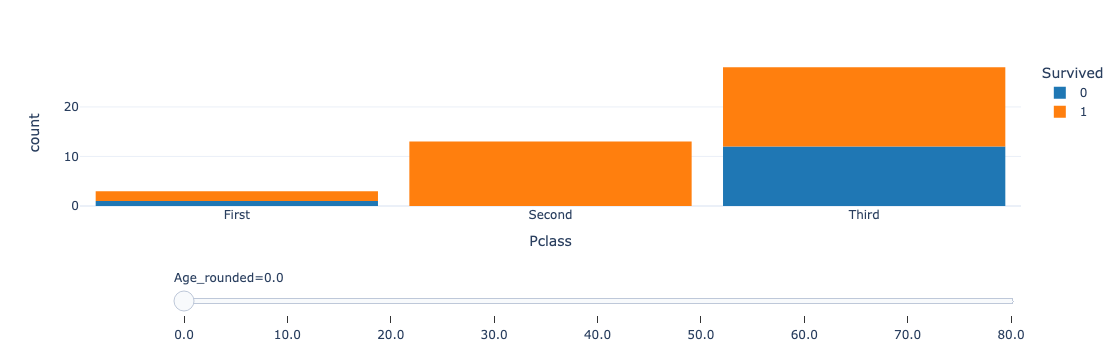

In [58]:
fig = px.histogram(df.sort_values('Age_rounded'), 
                   x='Pclass',
                   color='Survived',
                   template='plotly_white',
                   animation_frame="Age_rounded",  # this is the value to "animate"
                   # animation_group="PassengerId",  # uncomment this ...
                   color_discrete_sequence=px.colors.qualitative.D3)

fig.update_layout(
    xaxis_tickmode = 'array',
    xaxis_tickvals = [1, 2, 3],
    xaxis_ticktext = ['First', 'Second', 'Third'],
    bargap=0.1, # gap between bars of adjacent location coordinates
)

fig["layout"].pop("updatemenus") # drop animation buttons
fig.show()

**(In class, if there's time) Can we improve on this?**

In [59]:
# fig = px.histogram(df.sort_values('Age_rounded'), 
#                    x='Pclass',
#                    facet_row='Survived',
#                    color='Age_rounded',
#                    template='plotly_white',
#                    color_discrete_sequence=px.colors.sequential.Blues)

# fig.update_layout(
#     xaxis_tickmode = 'array',
#     xaxis_tickvals = [1, 2, 3],
#     xaxis_ticktext = ['First', 'Second', 'Third'],
#     bargap=0.1, # gap between bars of adjacent location coordinates
# )

# fig["layout"].pop("updatemenus") # drop animation buttons
# fig.show()

# EXERCISES

## Exercise 1

Take a look at the `Cabin` column of the data, and investigate how it relates to at least one other column. Consider the context of the Titanic ship wreck. Try to formulate a question around this column, and visualize it using Plotly. **Build at least 2 different plots** of the same data.

Feel free to use the [gallery](https://plotly.com/python/) as a resource.

## Question:
Are the fares for passengers with cabins generally higher than those without cabins?

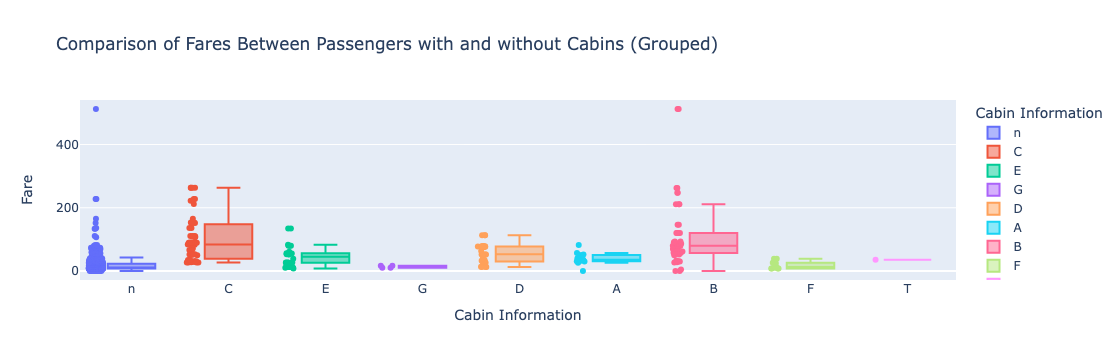

In [60]:
#grouping the cabins by extracting the first letter of the cabin information
df['Cabin_Group'] = df['Cabin'].astype(str).str[0]
fig = px.box(df, x="Cabin_Group", y="Fare", color="Cabin_Group",
             title="Comparison of Fares Between Passengers with and without Cabins (Grouped)",
             labels={"Cabin_Group": "Cabin Information", "Fare": "Fare"},
             hover_name="Name", points="all")
fig.show()

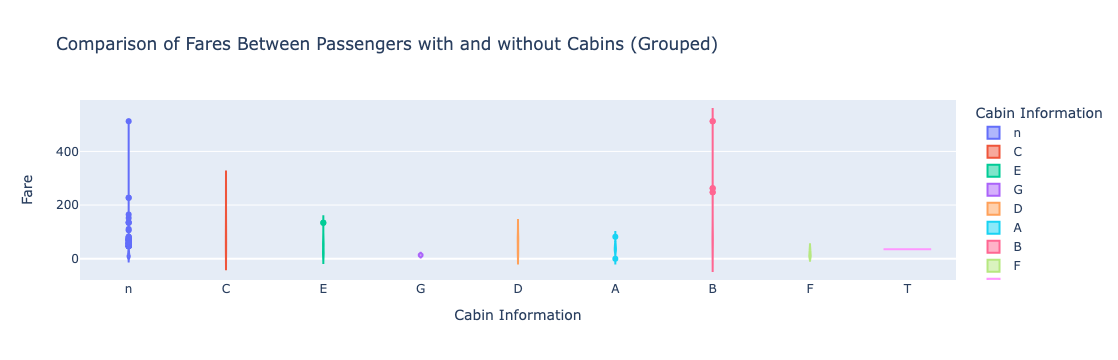

In [61]:
# building a violin plot
fig = px.violin(df, x="Cabin_Group", y="Fare", color="Cabin_Group",
                title="Comparison of Fares Between Passengers with and without Cabins (Grouped)",
                labels={"Cabin_Group": "Cabin Information", "Fare": "Fare"},
                hover_name="Name")
fig.show()

## Exercise 2

Consider the Bubble Plot, above. Try to figure out what it might be trying to communicate.

1. Point out at least three issues with this visualization.
2. Build at least two visualizations in Plotly that communicate a similar message, but which do it far better.

Three issues with the bubble plot:
1. The bubbles are overlapping, making it challenging to differentiate individual points.
2. Since we are using a scatter plot with bubble size to represent counts (e.g., 'Survived' and 'Passengers'), it is difficult to interpret the exact values. 
3. It is also difficult to compare the survival rates of different age groups and Pclasses within a bubble graph.

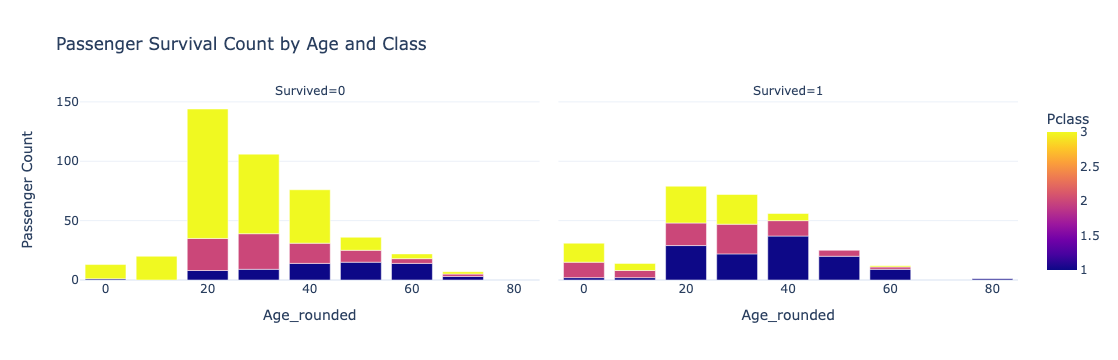

In [62]:
df_plot = df.groupby(['Pclass', 'Age_rounded', 'Survived']).size().reset_index(name='Count')

#building a bar plot
fig = px.bar(df_plot, x='Age_rounded', y='Count', color='Pclass',
             facet_col='Survived', category_orders={"Survived": [0, 1]},
             labels={'Count': 'Passenger Count'},
             title='Passenger Survival Count by Age and Class',
             template='plotly_white')
# To avoid legend duplicates
fig.update_layout(showlegend=False)  
fig.show()

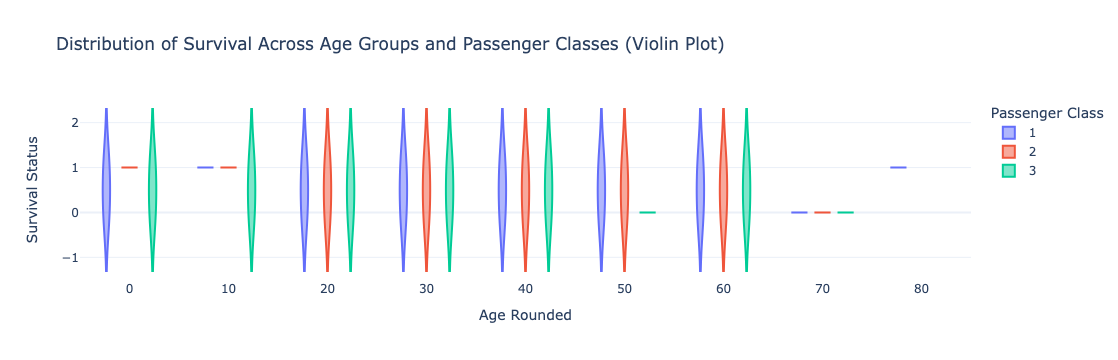

In [63]:
fig = px.violin(
    data_frame=df_plot,
    x="Age_rounded",
    y="Survived",
    color="Pclass",
    title="Distribution of Survival Across Age Groups and Passenger Classes (Violin Plot)",
    category_orders={"Survived": [0, 1]},
    labels={"Age_rounded": "Age Rounded", "Survived": "Survival Status", "Pclass": "Passenger Class"},
    template='plotly_white'
)
fig.show()